Opening the images

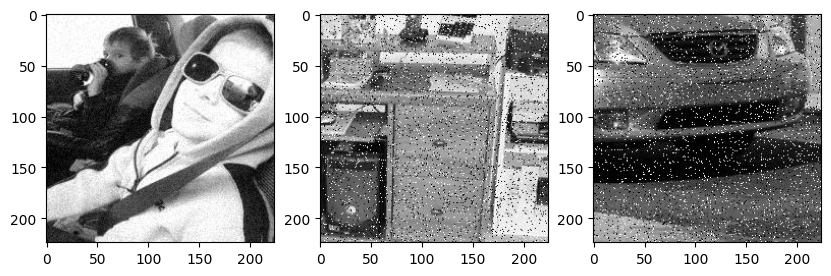

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image

# load three diffrent images with openCV 
img1 = Image.open('Q1_Images\\120.jpeg').convert("L")
img2 = Image.open('Q1_Images\\121.jpeg').convert("L")
img3 = Image.open('Q1_Images\\122.jpeg').convert("L")

# ensure that the images are black and white


# show the images with matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.subplot(132)
plt.imshow(img2, cmap='gray')
plt.subplot(133)
plt.imshow(img3, cmap='gray')
plt.show()





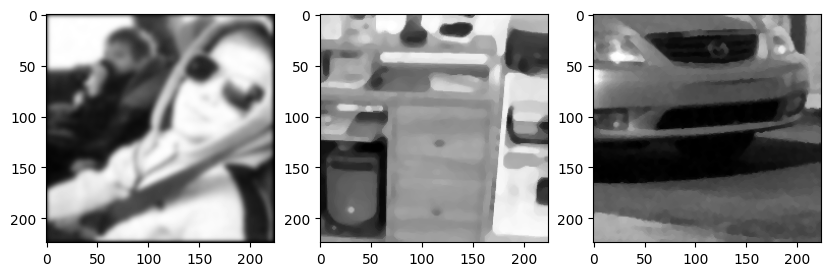

In [31]:
import numpy as np

# define the median filter function

def median_filter(data, filter_size):
    indexer = filter_size // 2
    data_final = np.zeros_like(data)

    for i in range(len(data)):
        for j in range(len(data[0])):
            temp = []

            for z in range(filter_size):
                for k in range(filter_size):
                    x = i + z - indexer
                    y = j + k - indexer

                    if 0 <= x < len(data) and 0 <= y < len(data[0]):
                        temp.append(data[x][y])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]

    return data_final

# define guassian filter function

def gaussian_filter(data, filter_size):
    indexer = filter_size // 2
    data_final = np.zeros_like(data) # generate the output array
    gaussian = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])

    for i in range(len(data)):
        for j in range(len(data[0])):
            temp = 0
            for z in range(filter_size):
                for k in range(filter_size):
                    x = i + z - indexer
                    y = j + k - indexer

                    if 0 <= x < len(data) and 0 <= y < len(data[0]):
                        temp += data[x][y] * gaussian[z][k]

            data_final[i][j] = temp / 16

    return data_final


# convert the images to numpy arrays
img1 = np.asarray(img1)
img2 = np.asarray(img2)
img3 = np.asarray(img3)

# apply the filters to the images
img1 = gaussian_filter(img1, 3)
img2 = median_filter(img2, 3)
img3 = median_filter(img3, 3)

# show the images with matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img1, cmap='gray')
plt.subplot(132)
plt.imshow(img2, cmap='gray')
plt.subplot(133)
plt.imshow(img3, cmap='gray')
plt.show()




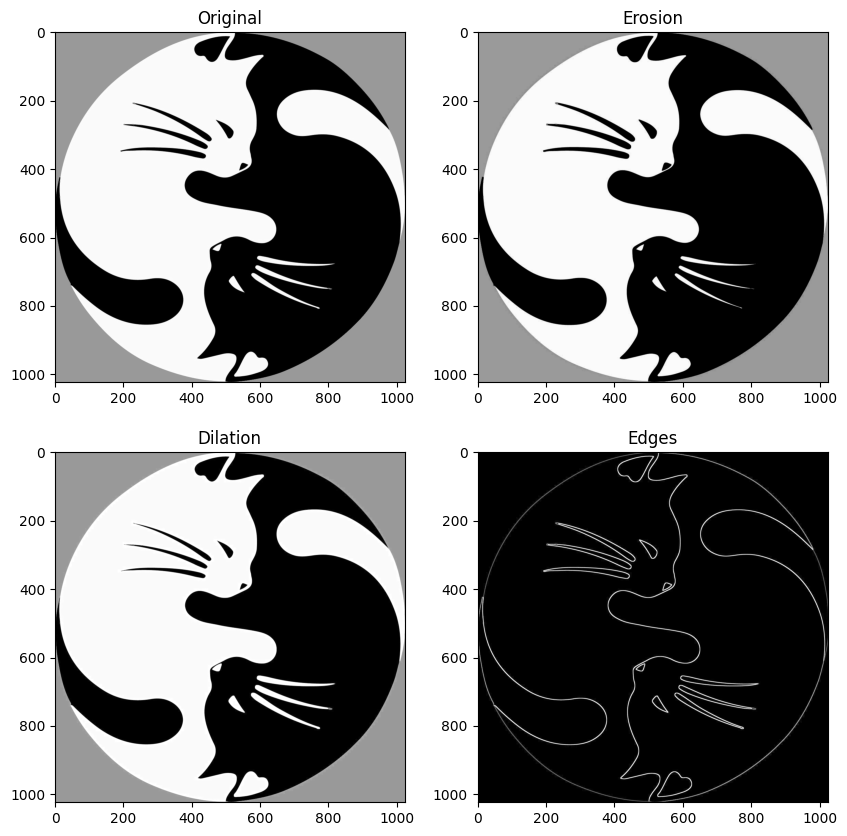

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Q2_Image\Figure_2.jpg', cv2.IMREAD_GRAYSCALE)

def erode(image, kernel_size=3, iterations=1):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    result = np.copy(image)

    for _ in range(iterations):
        temp = np.copy(result)
        for i in range(1, len(image) - 1):
            for j in range(1, len(image[0]) - 1):
                result[i, j] = np.min(temp[i-1:i+2, j-1:j+2] * kernel)

    return result.astype(np.uint8)

def dilate(image, kernel_size=3, iterations=1):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    result = np.copy(image)

    for _ in range(iterations):
        temp = np.copy(result)
        for i in range(1, len(image) - 1):
            for j in range(1, len(image[0]) - 1):
                result[i, j] = np.max(temp[i-1:i+2, j-1:j+2] * kernel)

    return result.astype(np.uint8)

def absdiff(image1, image2):
    return np.abs(image1 - image2).astype(np.uint8)

# Apply morphological operations
custom_erosion = erode(image, kernel_size=3, iterations=1)
custom_dilation = dilate(image, kernel_size=3, iterations=1)

# Compute the edges using custom function
custom_edges = absdiff(custom_dilation, custom_erosion)

# Compute the edges
edges = absdiff(custom_dilation, custom_erosion)

# Display the results
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(custom_erosion, cmap='gray'), plt.title('Erosion')
plt.subplot(223), plt.imshow(custom_dilation, cmap='gray'), plt.title('Dilation')
plt.subplot(224), plt.imshow(edges, cmap='gray'), plt.title('Edges')
plt.show()

